## Market Basket Analysis: Association Rule Mining
#### A project on a grocery story dataset.
-------------

### Importing Libarary

In [1]:
import pandas as pd

### Loading the data

In [3]:
df = pd.read_csv(r"C:\Users\SHIVANG\Documents\Imarticus\Advance ML\GroceryStoreDataSet.csv", header = None, names = ['product'])
df.head()
#names is used to give the col name

,product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


### Pre-processing the data

In [4]:
df.shape

(20, 1)

In [9]:
df.describe()
#frequency is not duplicates, it the amount of same transactions occured

,product
count,20
unique,17
top,"COFFEE,COKE,BISCUIT,CORNFLAKES"
freq,2


In [7]:
df.keys

<bound method NDFrame.keys of                            product
0               MILK,BREAD,BISCUIT
1    BREAD,MILK,BISCUIT,CORNFLAKES
2              BREAD,TEA,BOURNVITA
3             JAM,MAGGI,BREAD,MILK
4                MAGGI,TEA,BISCUIT
5              BREAD,TEA,BOURNVITA
6             MAGGI,TEA,CORNFLAKES
7          MAGGI,BREAD,TEA,BISCUIT
8              JAM,MAGGI,BREAD,TEA
9                       BREAD,MILK
10  COFFEE,COKE,BISCUIT,CORNFLAKES
11  COFFEE,COKE,BISCUIT,CORNFLAKES
12          COFFEE,SUGER,BOURNVITA
13               BREAD,COFFEE,COKE
14             BREAD,SUGER,BISCUIT
15         COFFEE,SUGER,CORNFLAKES
16           BREAD,SUGER,BOURNVITA
17              BREAD,COFFEE,SUGER
18              BREAD,COFFEE,SUGER
19      TEA,MILK,COFFEE,CORNFLAKES>

In [6]:
df.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COKE'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [11]:
data = list(df['product'].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [12]:
!pip install mlxtend

#### TO CONVERT CATEGORICAL DATA TO NUMERICAL DATA WE USE TRANSACTION ENCODING ONLY WHEN TRANSACTIONS DATASET IS GIVEN.

In [15]:
from mlxtend.preprocessing import TransactionEncoder

In [20]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [21]:
df.sum()
#shows sum of all products

BISCUIT        7
BOURNVITA      4
BREAD         13
COFFEE         8
COKE           3
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

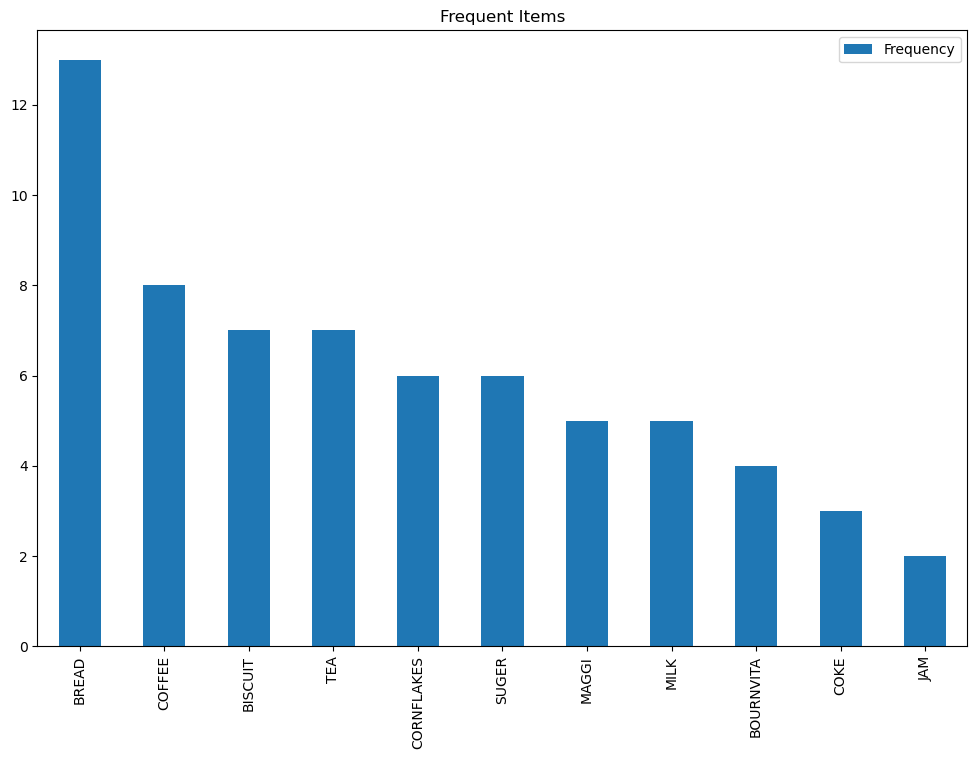

In [23]:
import matplotlib.pyplot as plt
df.sum().to_frame('Frequency').sort_values('Frequency',ascending = False).plot(kind='bar',figsize=(12,8),title = 'Frequent Items')
plt.show()

#sum get converted into a dataframe and the the graph is plotted.

In [27]:
df.shape[0]    #no of transactions
# o means rows = transactions
# 1 means columns = products

20

In [28]:
df.shape[1]    #no of products

11

In [29]:
df.shape

(20, 11)

### SUPPORT

In [30]:
# Support of individual product
# Product frequency / Total sales
first = pd.DataFrame(df.sum() / df.shape[0],columns = ['Support']).sort_values('Support',ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COKE,0.15


In [32]:
#Elimination by support value
first[first.Support > 0.50]

,Support
BREAD,0.65


In [33]:
#Elimination by support value
first[first.Support > 0.30]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35


In [34]:
import itertools

In [40]:
# Support of products in combinations
second = list(itertools.combinations(first.index,2))   
second = [list(i) for i in second]
second
#not using permutations because it will take milk and butter, butter and milk and 2 different combos. thats why use combinations

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COKE'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'COKE'],
 ['COFFEE', 'JAM'],
 ['BISCUIT', 'TEA'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'COKE'],
 ['BISCUIT', 'JAM'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'MILK'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'COKE'],
 ['TEA', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'COKE'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'MILK'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'COKE'],
 ['SUGER', 'JA

In [41]:
from mlxtend.frequent_patterns import apriori

In [43]:
#pd.set_option('display.max_rows',None)

In [45]:
df1 = apriori (df,min_support = 0.001, use_colnames=True)  
# 0.001 is the min treshold of support. some pairs or combos can have very less support.
df1.head(15)

#checks support for individual and combinations in one code, whereas i did single code for individual and combinations above.

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.15,(COKE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [44]:
df1.head(20).sort_values(by='support',ascending=False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
1,0.20,(BOURNVITA)
11,0.20,"(BISCUIT, BREAD)"


In [47]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1
#creating a new columns showing the length of each transaction containg how many products

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.40,(COFFEE),1
4,0.15,(COKE),1
...,...,...,...
78,0.05,"(BISCUIT, BREAD, TEA, MAGGI)",4
79,0.10,"(BISCUIT, COFFEE, CORNFLAKES, COKE)",4
80,0.05,"(JAM, MILK, MAGGI, BREAD)",4
81,0.05,"(JAM, BREAD, TEA, MAGGI)",4


In [49]:
df1[(df1['length']==2) & (df1['support']>0.15)]

,support,itemsets,length
11,0.2,"(BISCUIT, BREAD)",2
28,0.2,"(MILK, BREAD)",2
29,0.2,"(SUGER, BREAD)",2
30,0.2,"(BREAD, TEA)",2
32,0.2,"(COFFEE, CORNFLAKES)",2
34,0.2,"(SUGER, COFFEE)",2
45,0.2,"(MAGGI, TEA)",2


### ASSOCIATION RULE

In [51]:
from mlxtend.frequent_patterns import association_rules

In [59]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.60)].sort_values('confidence',ascending = False)
#ignore leverage convictions and zhangs

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
20,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000
9,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
13,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
14,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429


- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.

#### Lift indicates:

- Whether if two type of products can be sold together - lift value higher than 1
- Whether 1 product be substitute of other - lift value lower than 1
- Whether if there is no relation between the type or products - lift value equals to 1

### Analysis:
#### For MILK-BREAD pair: 
Antecedent support=0.25: Milk is observed in 25% of all the purchases. consequent support=0.65:
- Bread is observed 65% of all the purchases. support=0.20 : Milk and Bread are observed together in 20% of all purchases. confidence=0.8: If Milk is bought, Bread is 80% likely to be bought as well. Lift=1.23: That means Milk and Bread affects each other's sales positively. Sales of Bread increase by 1.23 times in transactions which contains Milk or visa versa.

#### For MAGGI-TEA pair: 
Antecedent support=0.25: Maggi is observed in 25% of all the purchases. consequent support=0.35:
- Tea is observed 35% of all the purchases. support=0.20 : Maggi and Tea are observed together in 20% of all purchases. confidence=0.8: If Maggi is bought, Tea is 80% likely to be bought as well. Lift=2.286: That means Maggi and Tea affects each other's sales positively. Sales of Maggi increase by 2.286 times in transactions which contains Tea or visa versa.

In [63]:
df_lift = association_rules(df1, metric = 'lift',min_threshold = 1)
df_lift.sort_values(by = 'lift',ascending = False)
#displaying results with lift >=1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(MILK, MAGGI)","(JAM, BREAD)",0.05,0.10,0.05,1.00,10.0,0.045,inf,0.947368
253,"(MILK, CORNFLAKES)","(TEA, COFFEE)",0.10,0.05,0.05,0.50,10.0,0.045,1.9,1.000000
230,(JAM),"(MILK, MAGGI, BREAD)",0.10,0.05,0.05,0.50,10.0,0.045,1.9,1.000000
187,"(BISCUIT, MILK)","(BREAD, CORNFLAKES)",0.10,0.05,0.05,0.50,10.0,0.045,1.9,1.000000
186,"(BREAD, CORNFLAKES)","(BISCUIT, MILK)",0.05,0.10,0.05,1.00,10.0,0.045,inf,0.947368
...,...,...,...,...,...,...,...,...,...,...
41,(MAGGI),"(BISCUIT, BREAD)",0.25,0.20,0.05,0.20,1.0,0.000,1.0,0.000000
125,"(MILK, BREAD)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.000,1.0,0.000000
142,"(COFFEE, CORNFLAKES)",(MILK),0.20,0.25,0.05,0.25,1.0,0.000,1.0,0.000000
128,(MAGGI),"(MILK, BREAD)",0.25,0.20,0.05,0.20,1.0,0.000,1.0,0.000000


In [65]:
df_lift = association_rules(df1, metric = 'lift',min_threshold = 0)
df_lift.sort_values(by = 'lift',ascending = False)
#displaying results with lift >=0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
259,"(BISCUIT, MILK)","(BREAD, CORNFLAKES)",0.10,0.05,0.05,0.500000,10.000000,0.045,1.900000,1.000000
328,"(MILK, COFFEE)","(TEA, CORNFLAKES)",0.05,0.10,0.05,1.000000,10.000000,0.045,inf,0.947368
304,(JAM),"(MILK, MAGGI, BREAD)",0.10,0.05,0.05,0.500000,10.000000,0.045,1.900000,1.000000
243,(JAM),"(MILK, MAGGI)",0.10,0.05,0.05,0.500000,10.000000,0.045,1.900000,1.000000
301,"(MILK, MAGGI)","(JAM, BREAD)",0.05,0.10,0.05,1.000000,10.000000,0.045,inf,0.947368
...,...,...,...,...,...,...,...,...,...,...
13,(SUGER),(BISCUIT),0.30,0.35,0.05,0.166667,0.476190,-0.055,0.780000,-0.611111
49,(COFFEE),(TEA),0.40,0.35,0.05,0.125000,0.357143,-0.090,0.742857,-0.750000
48,(TEA),(COFFEE),0.35,0.40,0.05,0.142857,0.357143,-0.090,0.700000,-0.734694
29,(CORNFLAKES),(BREAD),0.30,0.65,0.05,0.166667,0.256410,-0.145,0.420000,-0.805556


-------------------------
Done By: Shivang talati:)